# India Census Data

PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
from scipy import stats
import statistics 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'F:\Personal\PGP\Data Mining\Project\PCA+India+Data_Census.xlsx')

In [3]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [5]:
df.shape

(640, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [7]:
df.describe()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,17.114062,320.500000,51222.871875,79940.576563,122372.084375,12309.098438,11942.300000,13820.946875,20778.392188,6191.807813,...,1392.973438,2757.050000,250.889062,558.098438,560.690625,1293.431250,71.379688,200.742188,510.014063,704.778125
std,9.426486,184.896367,48135.405475,73384.511114,113600.717282,11500.906881,11326.294567,14426.373130,21727.887713,9912.668948,...,1489.707052,2788.776676,453.336594,1117.642748,762.578991,1585.377936,107.897627,309.740854,610.603187,910.209225
min,1.000000,1.000000,350.000000,391.000000,698.000000,56.000000,56.000000,0.000000,0.000000,0.000000,...,4.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,9.000000,160.750000,19484.000000,30228.000000,46517.750000,4733.750000,4672.250000,3466.250000,5603.250000,293.750000,...,489.500000,957.250000,47.000000,109.000000,136.500000,298.000000,14.000000,43.000000,161.000000,220.500000
50%,18.000000,320.500000,35837.000000,58339.000000,87724.500000,9159.000000,8663.000000,9591.500000,13709.000000,2333.500000,...,949.000000,1928.000000,114.500000,247.500000,308.000000,717.000000,35.000000,113.000000,326.000000,464.500000
75%,24.000000,480.250000,68892.000000,107918.500000,164251.750000,16520.250000,15902.250000,19429.750000,29180.000000,7658.000000,...,1714.000000,3599.750000,270.750000,568.750000,642.000000,1710.750000,79.000000,240.000000,604.500000,853.500000
max,35.000000,640.000000,310450.000000,485417.000000,750392.000000,96223.000000,95129.000000,103307.000000,156429.000000,96785.000000,...,9875.000000,21611.000000,5775.000000,17153.000000,6116.000000,13714.000000,895.000000,3354.000000,6456.000000,10533.000000


In [8]:
df.isnull().sum()

State Code       0
Dist.Code        0
State            0
Area Name        0
No_HH            0
                ..
MARG_HH_0_3_F    0
MARG_OT_0_3_M    0
MARG_OT_0_3_F    0
NON_WORK_M       0
NON_WORK_F       0
Length: 61, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['Ratio'] = df['TOT_M']/df['TOT_F']

In [11]:
df.groupby(['State'])['Ratio'].max().sort_values(ascending=False).reset_index()

,State,Ratio
0,Lakshadweep,0.868061
1,Jammu & Kashmir,0.847762
2,Uttar Pradesh,0.847313
3,Rajasthan,0.846911
4,Meghalaya,0.840393
5,NCT of Delhi,0.838542
6,Haryana,0.831138
7,Bihar,0.810596
8,Madhya Pradesh,0.802502
9,Uttarakhand,0.790733


In [12]:
df.groupby(['State'])['Ratio'].min().sort_values(ascending=True).reset_index()

,State,Ratio
0,Andhra Pradesh,0.437972
1,Odisha,0.440769
2,Tamil Nadu,0.449352
3,Himachal Pradesh,0.459871
4,Chhattisgarh,0.463301
5,Kerala,0.501805
6,Arunachal Pradesh,0.502289
7,Maharashtra,0.503177
8,Nagaland,0.506881
9,Uttarakhand,0.519622


In [13]:
df.groupby(['Area Name'])['Ratio'].max().sort_values(ascending=False).reset_index()

,Area Name,Ratio
0,Lakshadweep,0.868061
1,Badgam,0.847762
2,Mahamaya Nagar,0.847313
3,Dhaulpur,0.846911
4,Baghpat,0.844003
...,...,...
630,Baudh,0.451455
631,West Godavari,0.450076
632,Virudhunagar,0.449352
633,Koraput,0.440769


In [14]:
df.groupby(['Area Name'])['Ratio'].min().sort_values(ascending=True).reset_index()

,Area Name,Ratio
0,Krishna,0.437972
1,Koraput,0.440769
2,Virudhunagar,0.449352
3,West Godavari,0.450076
4,Baudh,0.451455
...,...,...
630,Baghpat,0.844003
631,Dhaulpur,0.846911
632,Mahamaya Nagar,0.847313
633,Badgam,0.847762


In [15]:
df_eda = df.iloc[:,4:9]

In [16]:
df_eda

,No_HH,TOT_M,TOT_F,M_06,F_06
0,7707,23388,29796,5862,6196
1,6218,19585,23102,4482,3733
2,4452,6546,10964,1082,1018
3,1320,2784,4206,563,677
4,11654,20591,29981,5157,4587
...,...,...,...,...,...
635,3333,8154,11781,1146,1203
636,10612,12346,21691,1544,1533
637,1275,1549,2630,227,225
638,3762,5200,8012,723,664


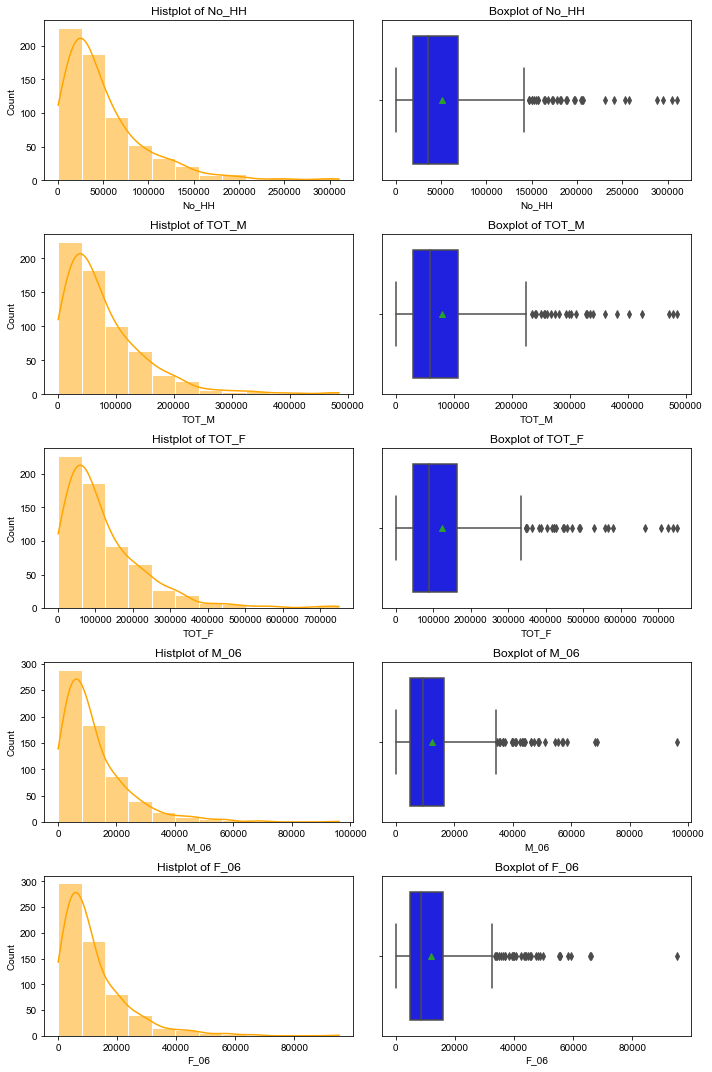

In [17]:
j=0
fig, axes = plt.subplots(nrows=5,ncols=2,squeeze=False)
fig.set_size_inches(10,15);
print('')
sns.set_style('whitegrid')
sns.set_style("whitegrid", {"grid.linestyle": " "})
for i in df_eda.columns[0:5]:
    sns.boxplot(x=i, color='blue',data=df_eda, ax=axes[j][1],showmeans=True).set(title='Boxplot of {}'.format(i));
    sns.histplot(x=df_eda[i],color='orange',bins=12,kde=True, ax=axes[j][0]).set(title='Histplot of {}'.format(i));
    j=j+1
plt.tight_layout();   
plt.show();

In [18]:
df_pca = df.drop(['State','Area Name','State Code','Dist.Code','Ratio'],axis=1)

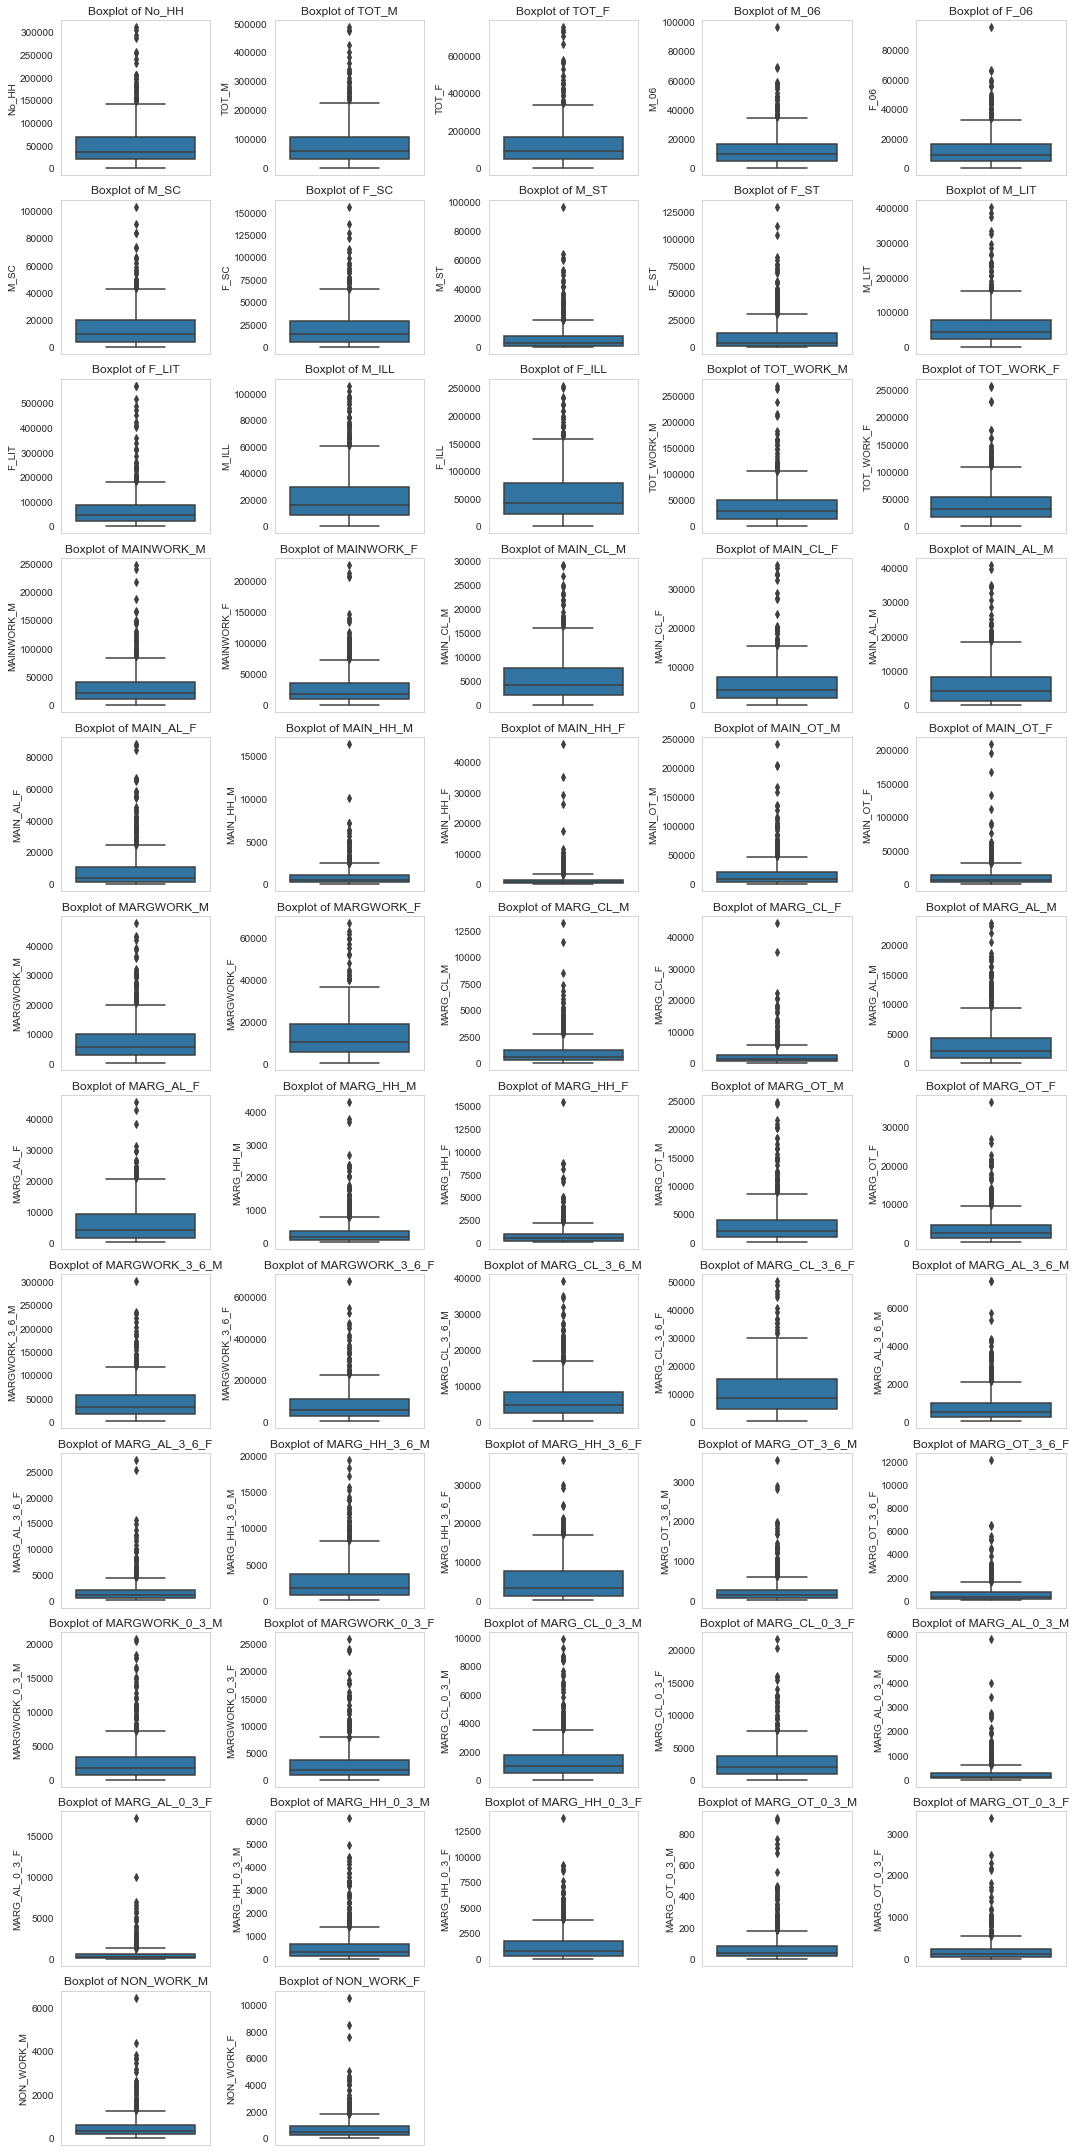

In [19]:
plt.figure(figsize = (15,30))
feature_list = df_pca.columns
for i in range(len(feature_list)):
    plt.subplot(12, 5, i + 1)
    sns.boxplot(y = df_pca[feature_list[i]], data = df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout() 

In [20]:
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [21]:
df_pca_scaled

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.995677,-0.978990,-0.974268,-0.971387,-0.948916,-0.957326,-0.955667,-0.625124,-0.640197,-0.913820,...,-0.914299,-0.972530,-0.553861,-0.499744,-0.735831,-0.816489,-0.662068,-0.648604,-0.783468,-0.723232
636,-0.844340,-0.921822,-0.886965,-0.936754,-0.919757,-0.803806,-0.765670,-0.625124,-0.640197,-0.853390,...,-0.831668,-0.868461,-0.547238,-0.487208,-0.685961,-0.734425,-0.624966,-0.574290,-0.655625,-0.587993
637,-1.038465,-1.069066,-1.054885,-1.051356,-1.035331,-0.958783,-0.957049,-0.522953,-0.529880,-1.016367,...,-0.865930,-0.941309,-0.533992,-0.496162,-0.733206,-0.812701,-0.504388,-0.496746,-0.711352,-0.690247
638,-0.986758,-1.019276,-1.007472,-1.008195,-0.996541,-0.958783,-0.957049,-0.622297,-0.637046,-0.962328,...,-0.844432,-0.927673,-0.500878,-0.460344,-0.721395,-0.803232,-0.652792,-0.635680,-0.672015,-0.661660


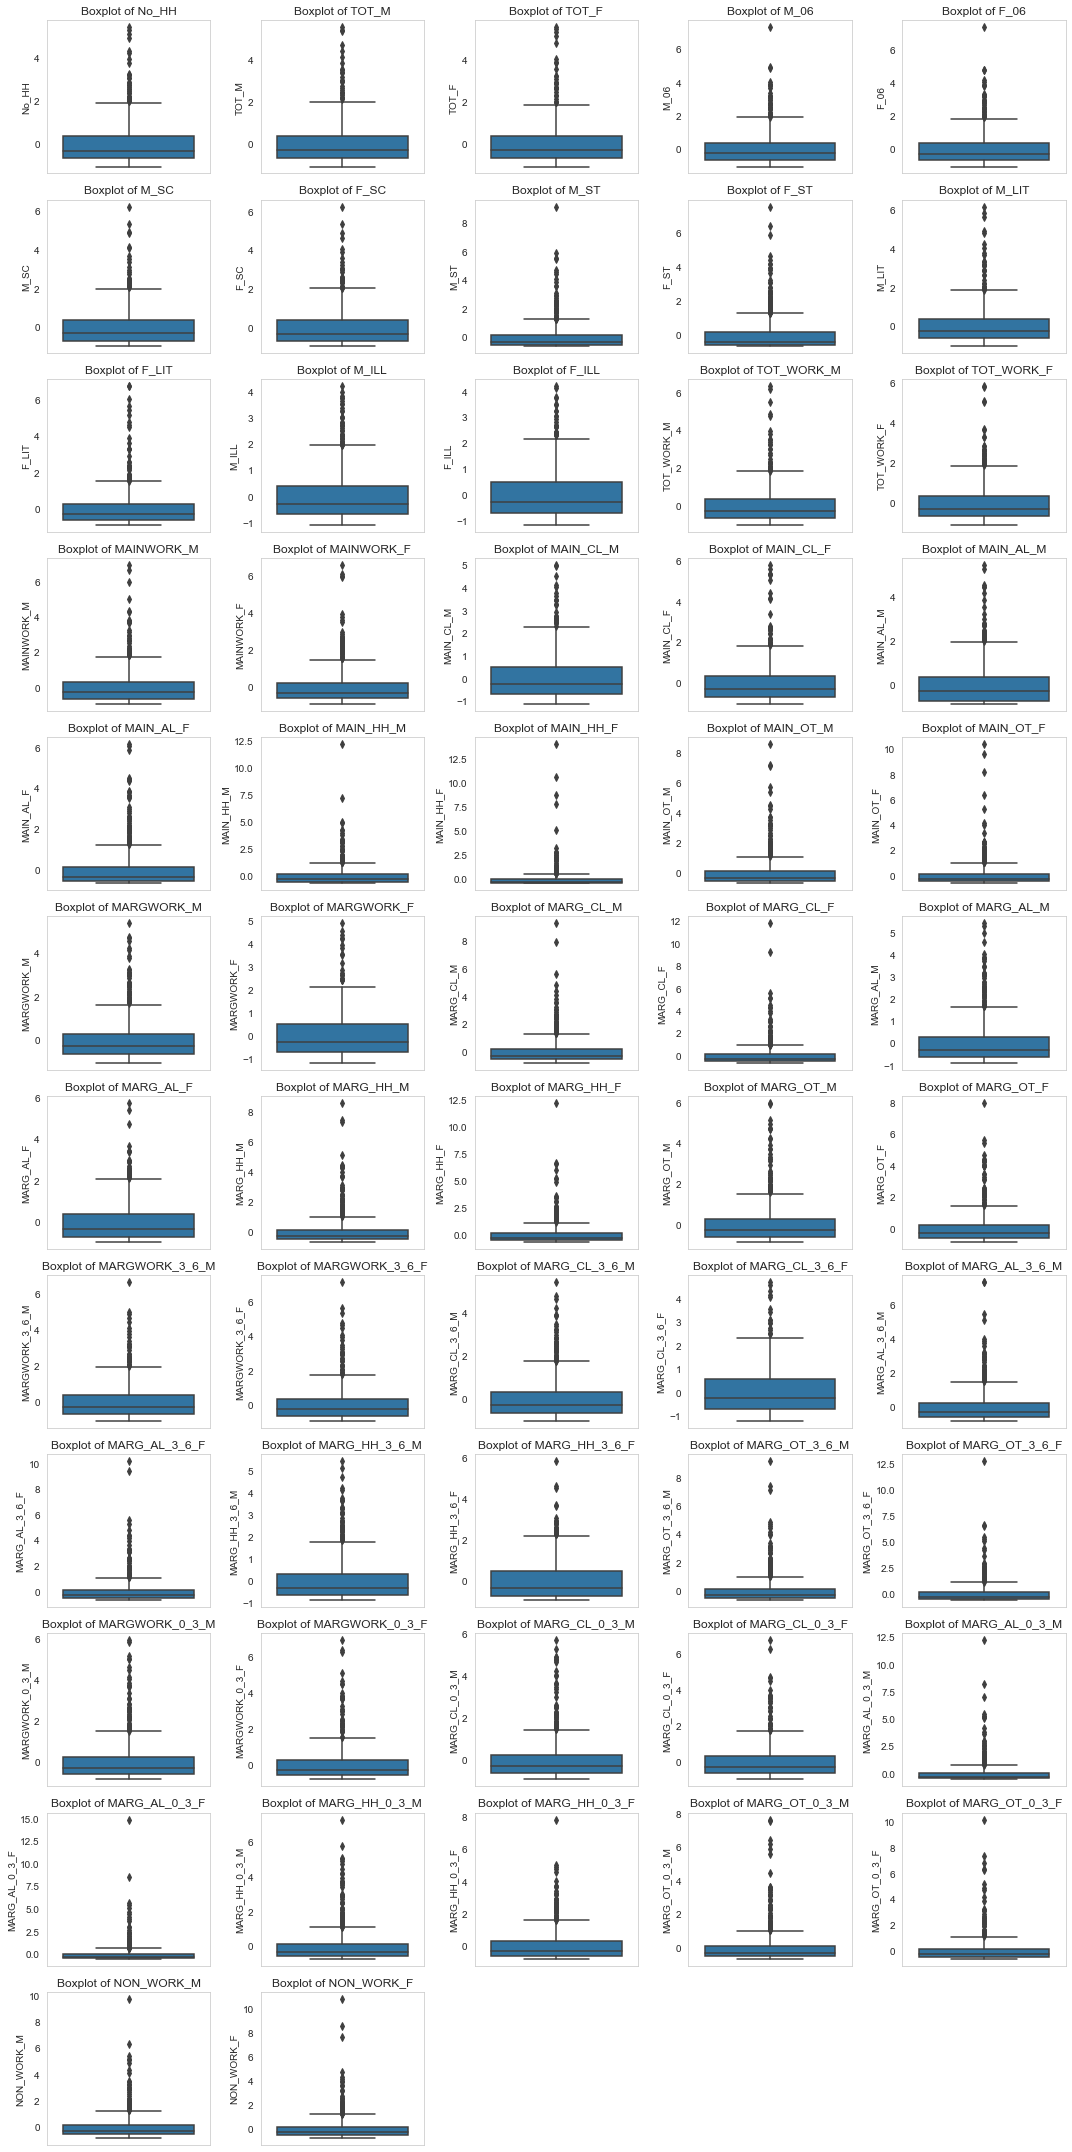

In [22]:
plt.figure(figsize = (15,30))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(12, 5, i + 1)
    sns.boxplot(y = df_pca_scaled[feature_list[i]], data = df_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout() 

In [23]:
corr = df_pca_scaled.corr()
corr

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.000000,0.916170,0.970590,0.797559,0.796373,0.775309,0.823847,0.149627,0.165102,0.931938,...,0.556941,0.555543,0.067425,0.046128,0.368591,0.417447,0.486747,0.536854,0.762384,0.735692
TOT_M,0.916170,1.000000,0.982640,0.950825,0.947792,0.839925,0.826299,0.091421,0.086180,0.989312,...,0.698310,0.595696,0.167405,0.115580,0.495928,0.440360,0.651604,0.588180,0.844896,0.716061
TOT_F,0.970590,0.982640,1.000000,0.907975,0.906557,0.816959,0.832756,0.123626,0.128646,0.985441,...,0.655347,0.598951,0.138763,0.099438,0.451011,0.443132,0.593805,0.571853,0.827653,0.746583
M_06,0.797559,0.950825,0.907975,1.000000,0.998151,0.781120,0.747530,0.055274,0.043948,0.912757,...,0.760610,0.646998,0.266674,0.198338,0.601090,0.514055,0.690601,0.565030,0.784961,0.651143
F_06,0.796373,0.947792,0.906557,0.998151,1.000000,0.773135,0.741686,0.065138,0.054662,0.907641,...,0.763614,0.649834,0.258670,0.189568,0.611568,0.523270,0.698636,0.574178,0.783727,0.651439
M_SC,0.775309,0.839925,0.816959,0.781120,0.773135,1.000000,0.985071,-0.045666,-0.047825,0.818484,...,0.673633,0.569579,0.184332,0.129750,0.523450,0.461898,0.664918,0.591437,0.735399,0.580020
F_SC,0.823847,0.826299,0.832756,0.747530,0.741686,0.985071,1.000000,-0.014122,-0.009190,0.814150,...,0.650455,0.585690,0.163427,0.116228,0.508006,0.488657,0.628470,0.589346,0.720099,0.600089
M_ST,0.149627,0.091421,0.123626,0.055274,0.065138,-0.045666,-0.014122,1.000000,0.988047,0.090541,...,0.122967,0.196571,0.027219,0.007077,0.126336,0.238813,-0.005482,0.090123,0.122986,0.146954
F_ST,0.165102,0.086180,0.128646,0.043948,0.054662,-0.047825,-0.009190,0.988047,1.000000,0.087375,...,0.121411,0.216741,0.017205,0.002556,0.136396,0.273307,-0.005880,0.099984,0.114131,0.150869
M_LIT,0.931938,0.989312,0.985441,0.912757,0.907641,0.818484,0.814150,0.090541,0.087375,1.000000,...,0.652507,0.560065,0.144067,0.101355,0.421762,0.381727,0.600120,0.552371,0.852199,0.738672


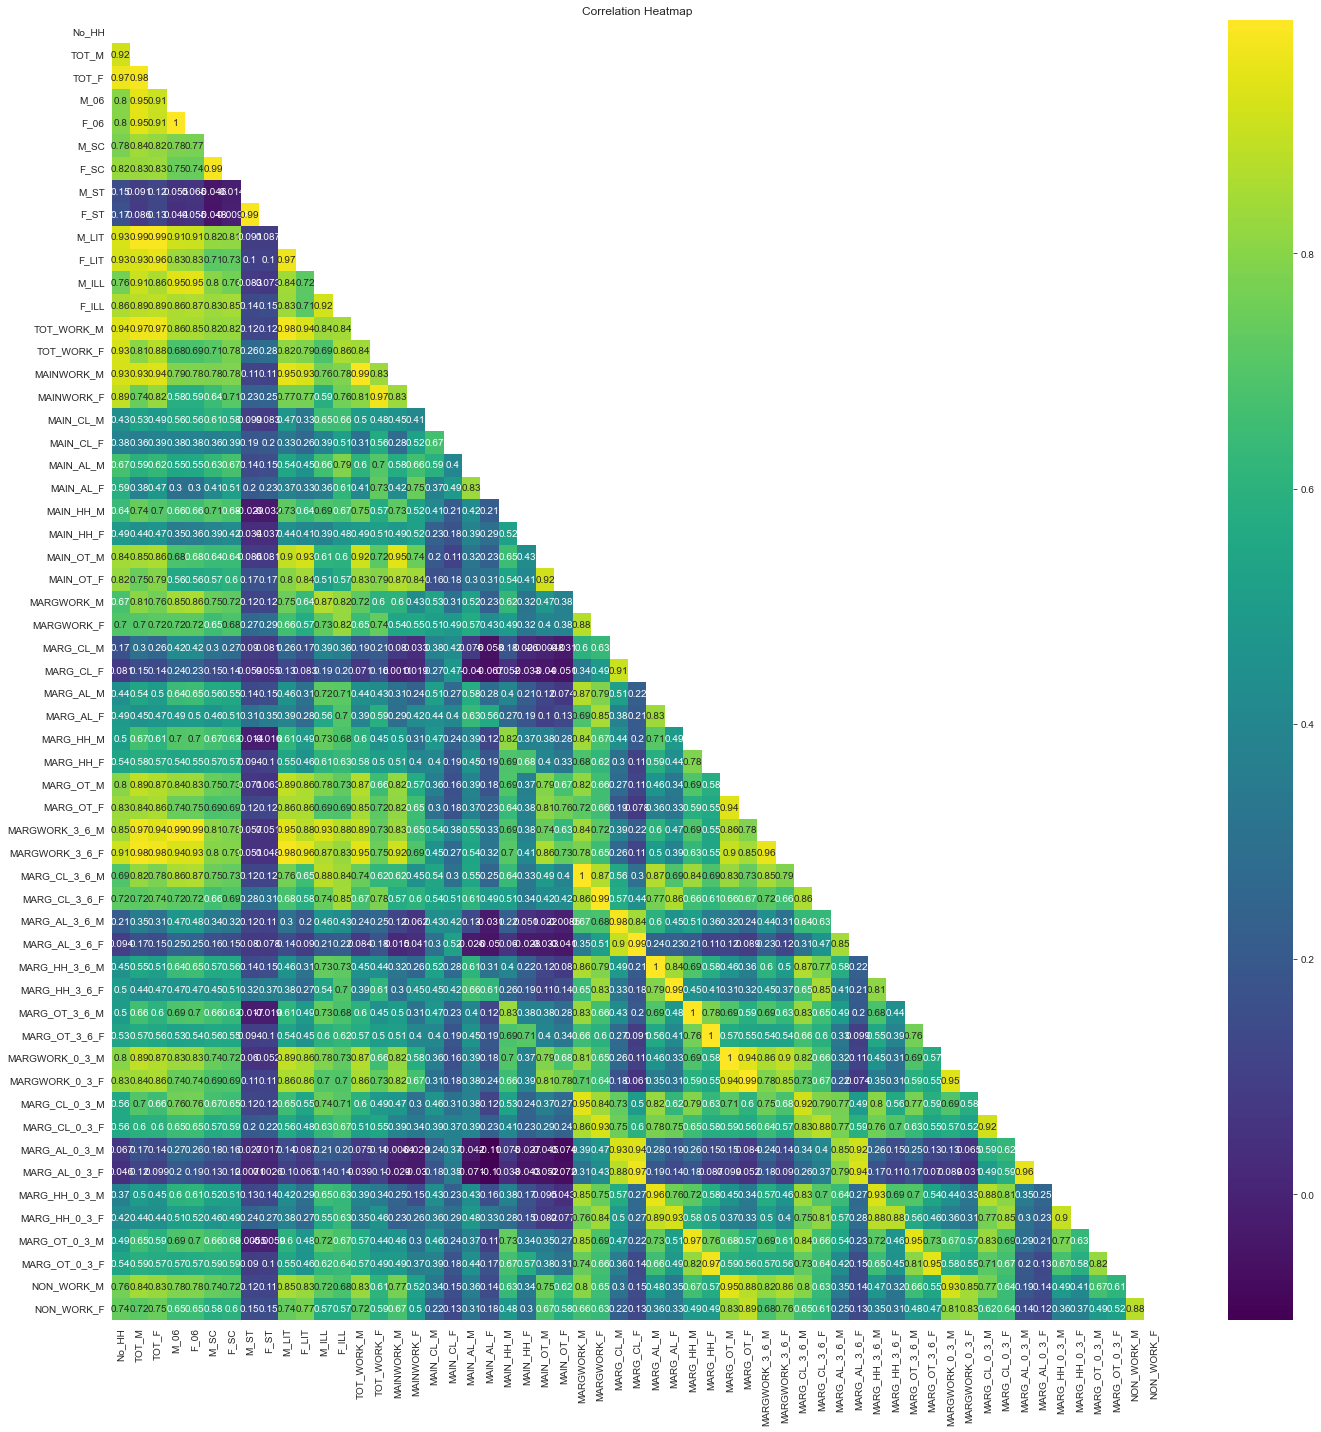

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap= 'viridis', mask = np.triu(corr)).set(title='Correlation Heatmap')
plt.tight_layout()

In [25]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

In [26]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.803988993278217

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=57, random_state=1)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [28]:
pca.components_

array([[ 0.15602058,  0.16711763,  0.16555318, ...,  0.13219224,
         0.15037558,  0.1310662 ],
       [-0.12634653, -0.08967655, -0.10491237, ...,  0.05081332,
        -0.06536455, -0.07384742],
       [-0.00269025,  0.05669762,  0.03874947, ..., -0.07871987,
         0.11182732,  0.1025525 ],
       ...,
       [ 0.        ,  0.2077636 ,  0.24647657, ..., -0.07217993,
         0.00399206, -0.06929081],
       [ 0.        ,  0.2887035 , -0.20596721, ...,  0.04019745,
        -0.03192722,  0.00778048],
       [-0.        ,  0.18790022,  0.02642675, ..., -0.02597314,
        -0.13972835, -0.02147533]])

In [29]:
pca.explained_variance_

array([3.18135647e+01, 7.86942415e+00, 4.15340812e+00, 3.66879058e+00,
       2.20652588e+00, 1.93827502e+00, 1.17617374e+00, 7.51159086e-01,
       6.17053743e-01, 5.28300887e-01, 4.29831189e-01, 3.53440201e-01,
       2.96163013e-01, 2.81275560e-01, 1.92158325e-01, 1.36267920e-01,
       1.13389199e-01, 1.06303946e-01, 9.72885376e-02, 8.01062194e-02,
       5.76089954e-02, 4.43955966e-02, 3.78910846e-02, 2.96360194e-02,
       2.70797618e-02, 2.34458139e-02, 1.45111511e-02, 1.09852268e-02,
       9.31507853e-03, 8.13540203e-03, 7.89250253e-03, 5.02601514e-03,
       2.59771182e-03, 1.06789820e-03, 7.13559124e-04, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
       2.47799812e-31, 2.47799812e-31, 2.47799812e-31, 2.47799812e-31,
      

In [30]:
pca.explained_variance_ratio_

array([5.57260632e-01, 1.37844354e-01, 7.27529548e-02, 6.42641771e-02,
       3.86504944e-02, 3.39516923e-02, 2.06023855e-02, 1.31576386e-02,
       1.08085894e-02, 9.25395468e-03, 7.52911540e-03, 6.19101667e-03,
       5.18772384e-03, 4.92694855e-03, 3.36593119e-03, 2.38692984e-03,
       1.98617593e-03, 1.86206747e-03, 1.70414955e-03, 1.40317638e-03,
       1.00910494e-03, 7.77653131e-04, 6.63717190e-04, 5.19117774e-04,
       4.74341222e-04, 4.10687364e-04, 2.54183814e-04, 1.92422147e-04,
       1.63167083e-04, 1.42503342e-04, 1.38248605e-04, 8.80379297e-05,
       4.55026824e-05, 1.87057826e-05, 1.24990208e-05, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
       4.34057237e-33, 4.34057237e-33, 4.34057237e-33, 4.34057237e-33,
      

In [31]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2','PC3','PC4','PC5','PC6',
                                               'PC7','PC8','PC9','PC10','PC11','PC12',
                                               'PC13','PC14','PC15','PC16','PC17','PC18',
                                               'PC19','PC20','PC21','PC22','PC23','PC24',
                                               'PC25','PC26','PC27','PC28','PC29','PC30',
                                               'PC31','PC32','PC33','PC34','PC35','PC36',
                                               'PC37','PC38','PC39','PC40','PC41','PC42',
                                               'PC43','PC44','PC45','PC46','PC47','PC48',
                                               'PC49','PC50','PC51','PC52','PC53','PC54',
                                               'PC55','PC56','PC57'],
                                    index = df_pca_scaled.columns)

In [32]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238,0.004265,0.019985,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024501,...,1.617181e-01,-3.303320e-01,-2.059894e-01,3.603136e-01,5.705250e-02,-5.500596e-02,2.085654e-01,2.077636e-01,2.887035e-01,1.879002e-01
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038041,...,1.907122e-01,-8.601042e-02,-1.608897e-01,-1.625048e-01,1.682776e-01,-2.897220e-01,-1.875516e-01,2.464766e-01,-2.059672e-01,2.642675e-02
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153574,...,-2.870332e-15,-3.410187e-16,-5.577075e-16,4.228508e-15,-1.807309e-15,-1.402359e-15,2.162048e-15,-1.035093e-15,9.011819e-16,1.054760e-15
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459,-0.059323,-0.169567,...,2.475438e-15,2.685312e-16,-4.896323e-16,-2.956643e-15,2.466542e-15,4.935750e-16,-2.078115e-15,6.018242e-16,-1.034874e-15,-1.244560e-15
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517,...,2.230854e-15,1.734723e-16,-1.203898e-15,-6.591949e-16,7.806256e-16,4.987330e-17,9.992007e-16,-2.567391e-16,1.193490e-15,2.046974e-16
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,...,-2.319125e-15,-3.999868e-16,1.219330e-15,5.288230e-16,-5.610032e-16,5.905796e-17,-1.283792e-15,1.483734e-16,-1.459949e-15,-3.444703e-16
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,...,-6.375109e-16,2.532696e-16,9.957313e-16,-4.753142e-16,9.220055e-16,2.090342e-16,-2.792905e-16,6.626644e-16,-3.590878e-16,2.099015e-16
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873,0.043866,0.134862,...,7.199102e-16,-7.459311e-17,-8.812395e-16,2.853620e-16,-9.861903e-16,-2.619432e-16,2.099015e-16,-5.793976e-16,3.105155e-16,-2.324529e-16
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045193,-0.005752,...,7.940474e-02,2.718792e-01,3.688725e-01,-2.905299e-01,-1.007714e-01,1.545324e-01,1.180816e-01,2.098104e-01,2.719897e-01,-4.080427e-03


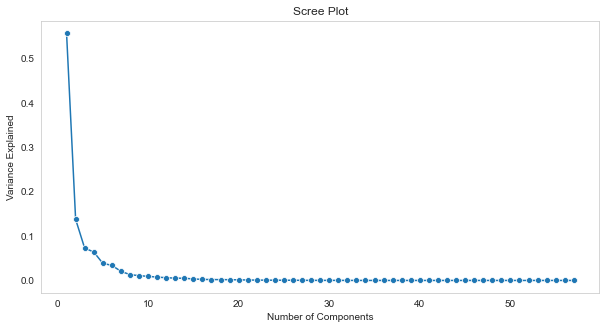

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(y=pca.explained_variance_ratio_,x=range(1,len(pca.explained_variance_ratio_)+1),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [34]:
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701, 0.97745473, 0.98238168, 0.98574761,
       0.98813454, 0.99012071, 0.99198278, 0.99368693, 0.99509011,
       0.99609921, 0.99687687, 0.99754058, 0.9980597 , 0.99853404,
       0.99894473, 0.99919891, 0.99939134, 0.9995545 , 0.99969701,
       0.99983525, 0.99992329, 0.9999688 , 0.9999875 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [35]:
df_selected = df_extracted_loadings[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423


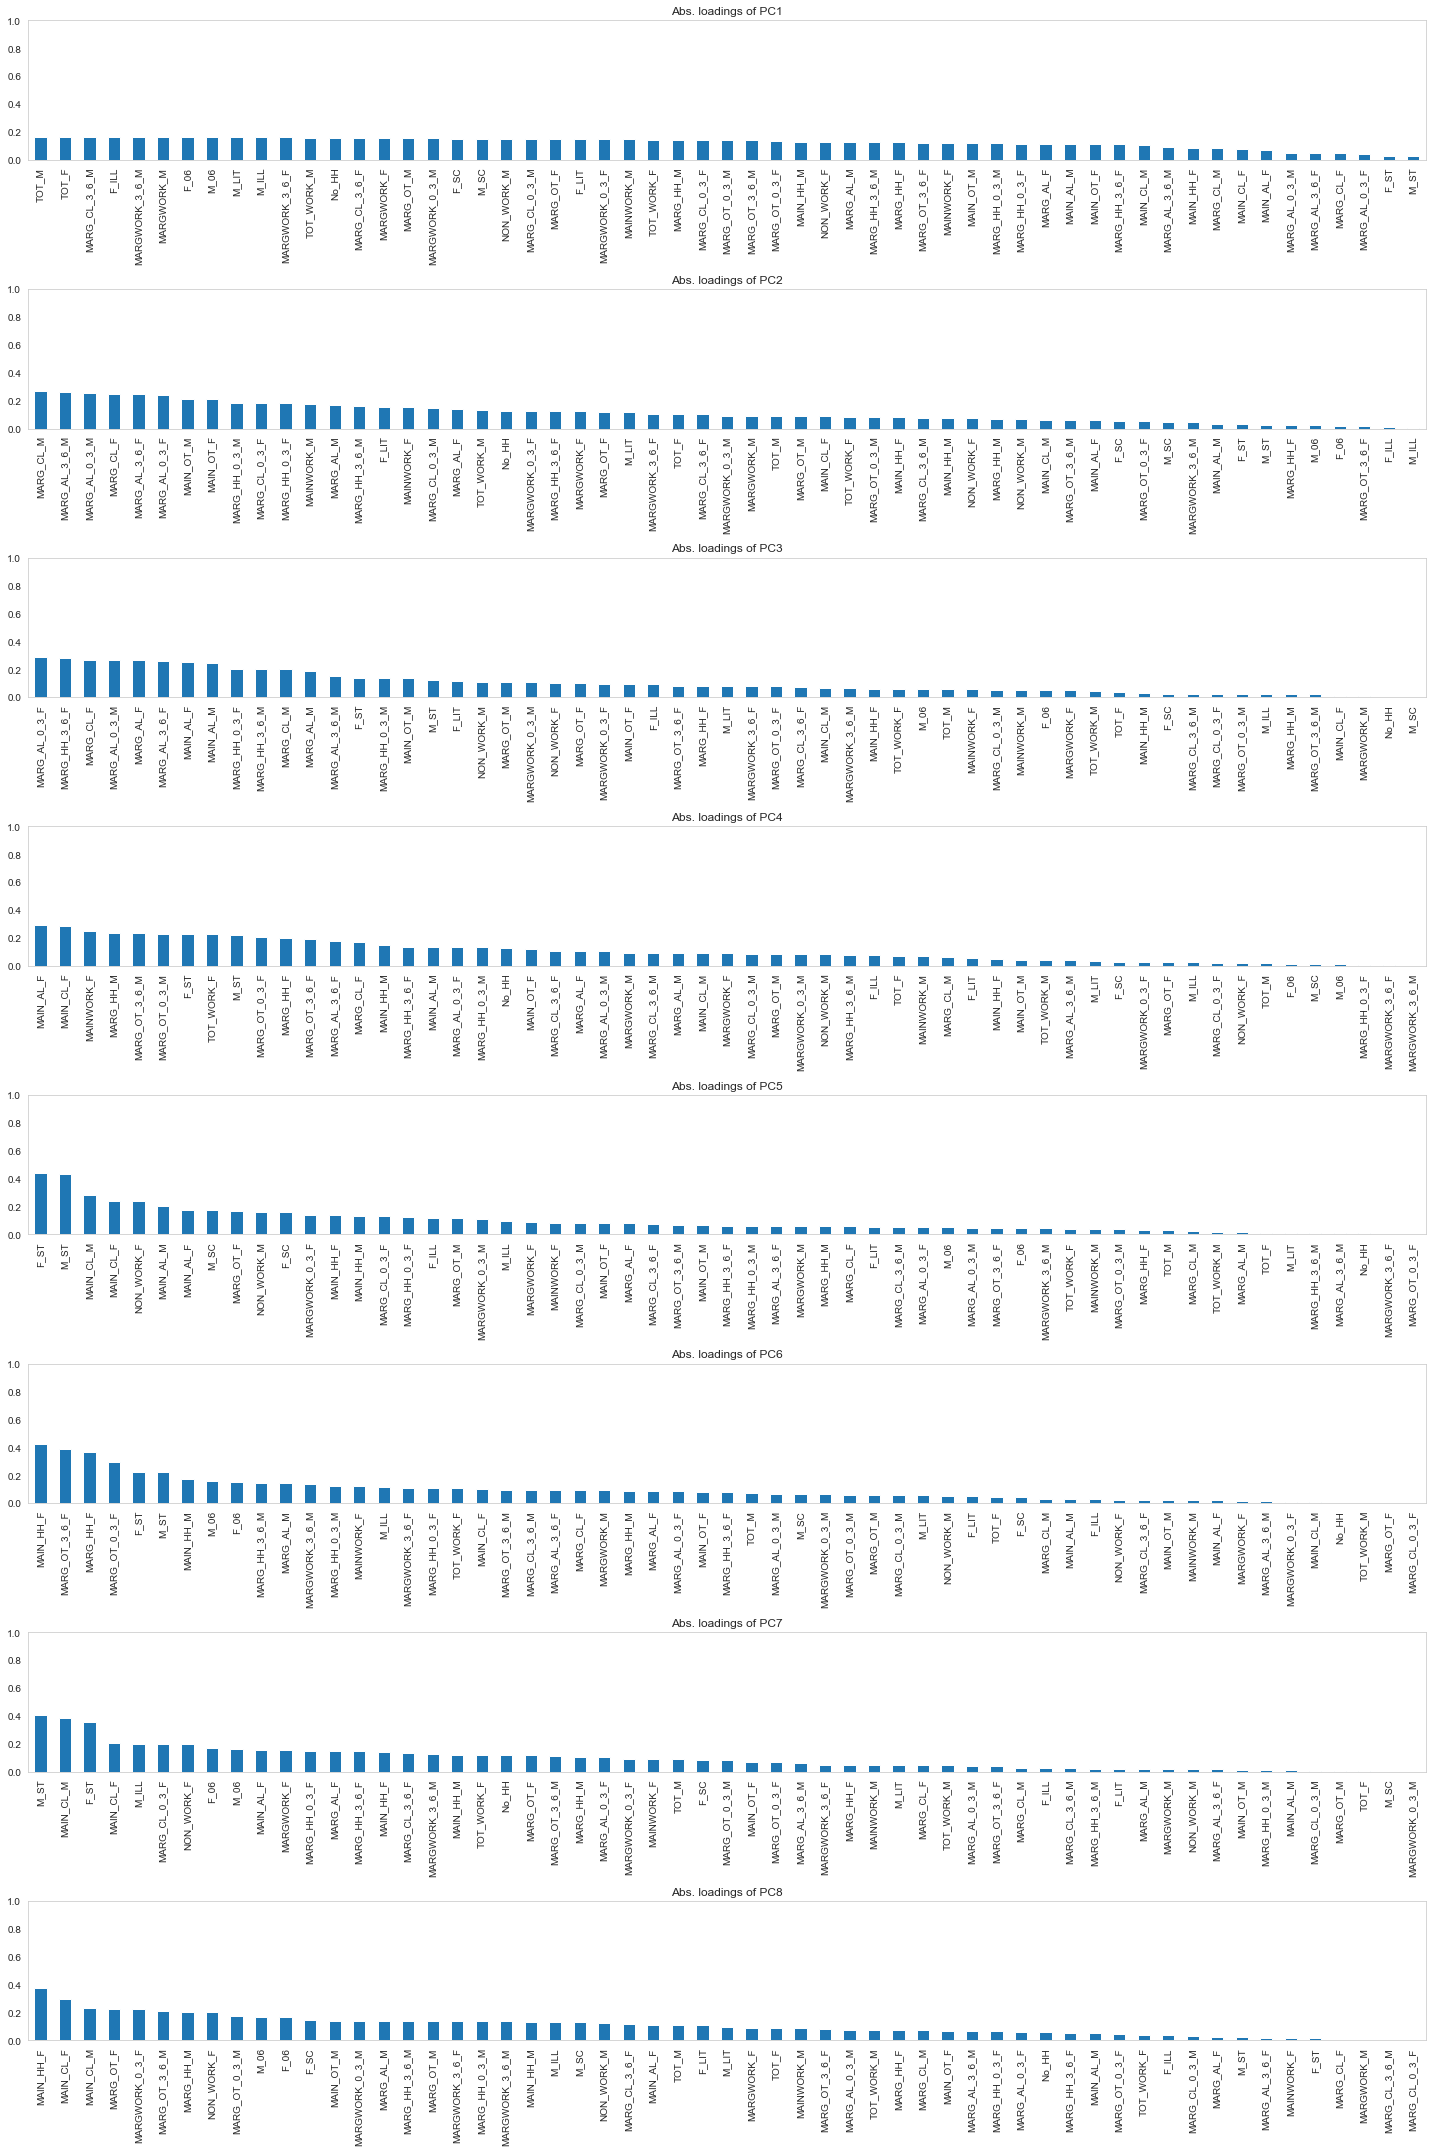

In [36]:
plt.figure(figsize = (20,30))
for i in range(len(df_selected.columns)):
    plt.subplot(8,1,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

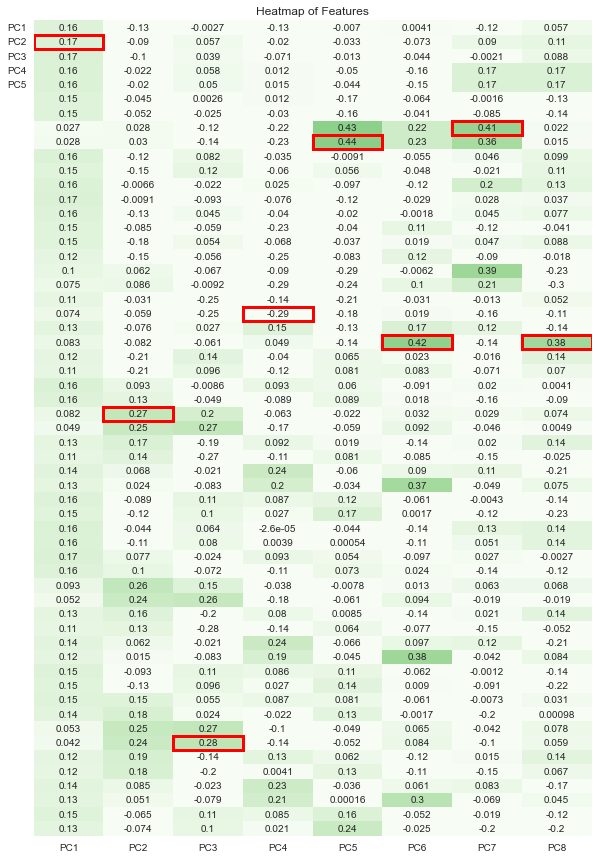

In [37]:
from matplotlib.patches import Rectangle
fig,ax = plt.subplots(figsize=(10, 15), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_selected, annot=True, vmax=1.0, vmin=0, cmap='Greens', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5'])

ax.set_title('Heatmap of Features')
column_max = df_selected.abs().idxmax(axis=0)

for col, variable in enumerate(df_selected.columns):
    position = df_selected.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [38]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057238
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169459
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014873
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423


In [39]:
df_pca_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [40]:
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-4.617263 0.138116 0.328545 1.543697 0.353737 -0.420947 -0.010393 0.479105 

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8, random_state=1)
pca_final = pca.fit_transform(df_pca_scaled)
pca

PCA(n_components=8, random_state=1)

In [42]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-4.617263,0.138116,0.328545,1.543697,0.353735,-0.420951,-0.010390,0.479083
1,-4.771662,-0.105865,0.244449,1.963215,-0.153887,0.417304,-0.023117,-0.006814
2,-5.964836,-0.294347,0.367393,0.619542,0.478201,0.276585,0.069551,0.040732
3,-6.280796,-0.500384,0.212701,1.074516,0.300798,0.051157,-0.250541,0.084357
4,-4.478566,0.894154,1.078277,0.535557,0.804062,0.341670,-0.092327,0.376935
5,-3.319963,2.823865,3.058460,-0.447905,0.742441,0.634664,-0.455675,0.397744
6,-5.021393,-0.346359,0.650378,0.981072,-0.059776,-0.246952,-0.135021,0.174012
7,-4.608709,0.022370,0.398755,1.576995,0.171316,-0.139445,-0.137580,0.276594
8,-5.186703,-0.059097,0.184397,1.735441,0.169172,0.455035,-0.267999,-0.090053
9,-4.226190,-1.335080,0.697838,1.470509,0.269147,-0.002574,-0.248794,0.178676


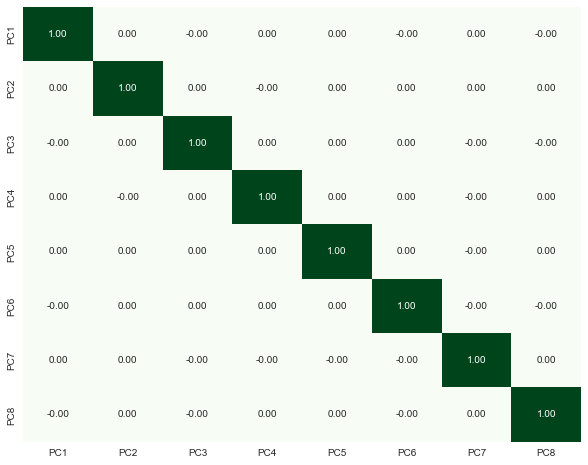

In [43]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f',cbar=False,cmap='Greens');